In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
image_size=256
batch_size=32

In [6]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size
)

Found 16011 files belonging to 10 classes.


In [7]:
class_names=dataset.class_names

In [8]:
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [9]:
len(dataset)

501

In [12]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[4 6 6 3 4 2 3 5 8 4 4 7 4 3 7 2 6 5 6 2 3 8 2 5 1 3 7 2 4 1 7 0]


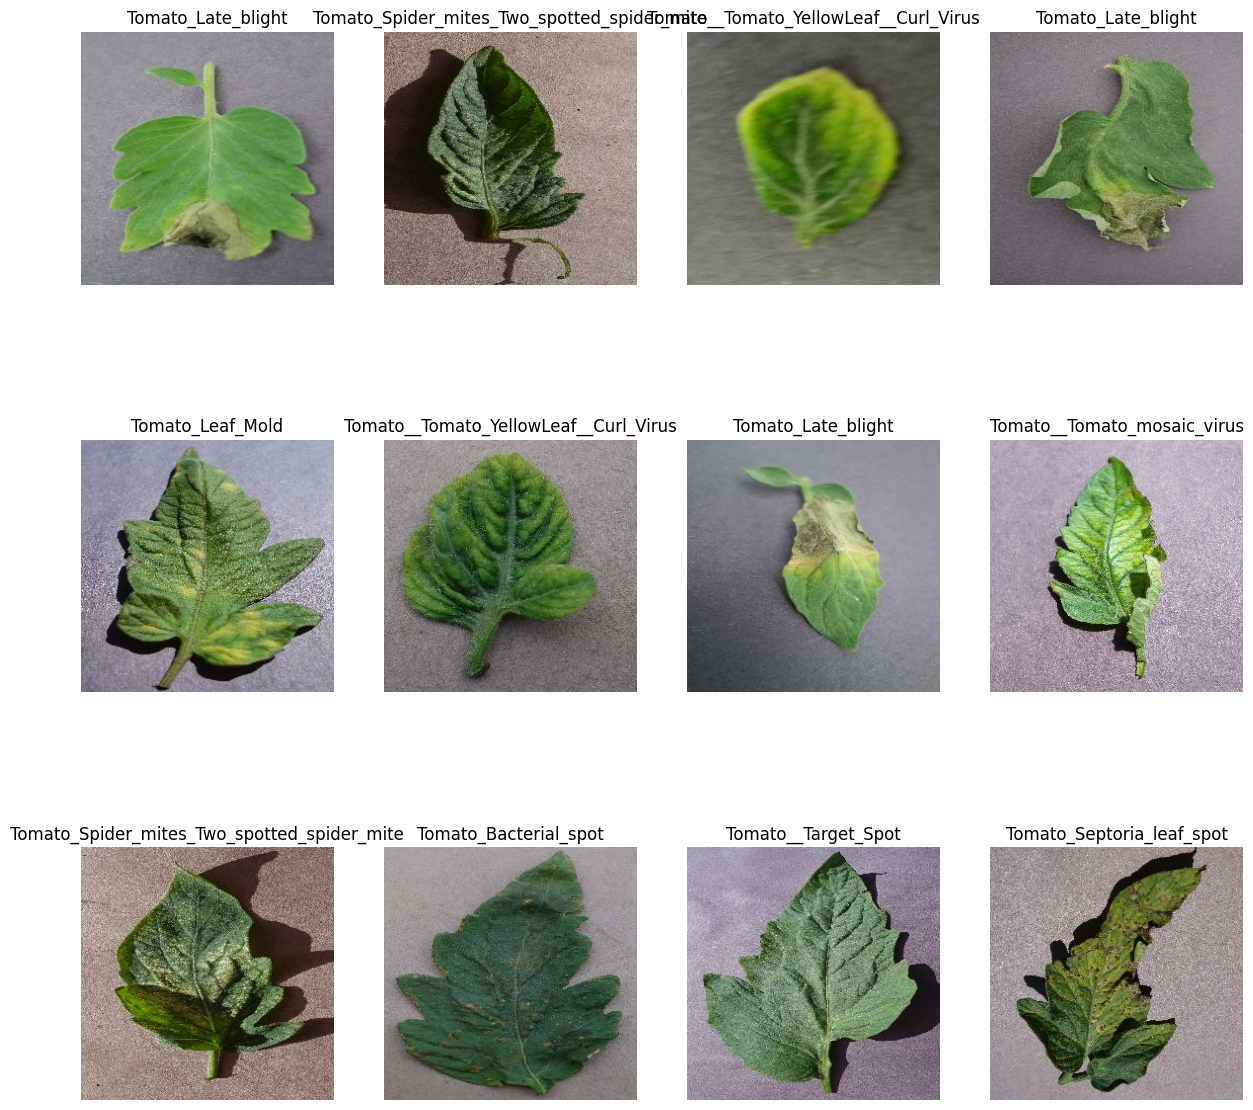

In [27]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in dataset.take(1):
    for i in range(0,12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [28]:
len(dataset)

501

In [31]:
train_df=dataset.take(int(len(dataset)*0.80))

In [32]:
len(train_df)

400

In [37]:
validation_df=dataset.skip(int(len(dataset)*0.80)).take(int(len(dataset)*0.1))

In [38]:
len(validation_df)

50

In [39]:
test_df=dataset.skip(int(len(dataset)*0.90)).take(int(len(dataset)*0.10))

In [40]:
len(test_df)

50

In [44]:
train_ds=train_df.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds=validation_df.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_df.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [47]:
preprocessing_layer = tf.keras.Sequential([
    tf.keras.layers.Resizing(image_size, image_size),
    tf.keras.layers.Rescaling(1.0/255)
])

In [50]:
data_augumentation= tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])

In [61]:
from tensorflow.keras import models, layers

input_shape = (image_size, image_size, 3)
num_classes = 10

model = models.Sequential([
    preprocessing_layer,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
history=model.fit(train_ds,
                 epochs=5,
                 batch_size=32,
                 verbose=1,
                 validation_data=validation_ds)

Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 556s 1s/step - accuracy: 0.4688 - loss: 1.5681 - val_accuracy: 0.7775 - val_loss: 0.6255
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 581s 1s/step - accuracy: 0.8320 - loss: 0.5056 - val_accuracy: 0.8238 - val_loss: 0.5236
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 521s 1s/step - accuracy: 0.8892 - loss: 0.3268 - val_accuracy: 0.8687 - val_loss: 0.3783
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 539s 1s/step - accuracy: 0.9303 - loss: 0.2129 - val_accuracy: 0.9006 - val_loss: 0.3289
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 562s 1s/step - accuracy: 0.9463 - loss: 0.1558 - val_accuracy: 0.8856 - val_loss: 0.3563


In [64]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │       7,372,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,400,288 (85.45 MB)

 Trainable params: 7,466,762 (28.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,933,526 (56.97 MB)

In [68]:
model.save("tamato.keras")

In [69]:
model.evaluate(test_ds)

50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 235ms/step - accuracy: 0.8864 - loss: 0.3823


[0.3843877911567688, 0.8924999833106995]

In [83]:
# Assuming `model` is your trained model and `test_ds` is your test dataset
for image_batch, label_batch in test_ds.take(1):
    predictions = model.predict(image_batch)
    print(class_names[np.argmax(predictions)])
    #print(label_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


IndexError: list index out of range